# MM20B007 DAL Assignment 6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error, precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

train_data_path = '/content/drive/MyDrive/sem 7/EE5708/Assignment 6/pulsar_data_train.xlsx'
test_data_path = '/content/drive/MyDrive/sem 7/EE5708/Assignment 6/pulsar_data_test.xlsx'

In [ ]:
train_data = pd.read_excel(train_data_path)

In [ ]:
train_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [ ]:
train_data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [ ]:
for cols in list(train_data.columns):
  s = train_data[cols].isna().sum()
  print(f'No. of missing values in {cols} are {s}')

No. of missing values in  Mean of the integrated profile are 0
No. of missing values in  Standard deviation of the integrated profile are 0
No. of missing values in  Excess kurtosis of the integrated profile are 1735
No. of missing values in  Skewness of the integrated profile are 0
No. of missing values in  Mean of the DM-SNR curve are 0
No. of missing values in  Standard deviation of the DM-SNR curve are 1178
No. of missing values in  Excess kurtosis of the DM-SNR curve are 0
No. of missing values in  Skewness of the DM-SNR curve are 625
No. of missing values in target_class are 0


## Observations

1. There are total of 12528 datapoints for each of 8 features and 1 target.
2. There are 3 features with missing data points
      *   Excess kurtosis of the integrated profile - 1735
      *   Standard deviation of the DM-SNR curve - 1178
      *   Skewness of the DM-SNR curve - 625

In [ ]:
df = train_data.copy()

Text(0.5, 0, 'Target labels')

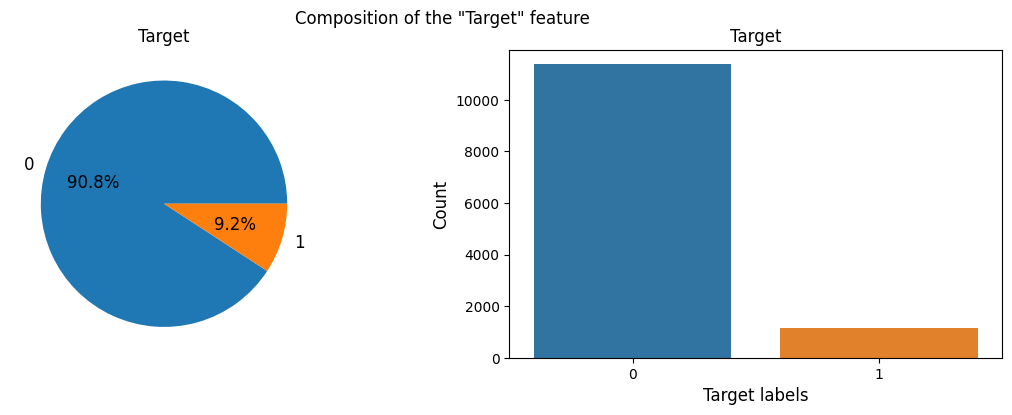

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
fig.suptitle('Composition of the "Target" feature')
df['target_class'].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%',shadow=False, textprops={'fontsize': 12})
ax[0].set_title('Target')
ax[0].set_ylabel(None)
sns.countplot(x = 'target_class', data = df, ax=ax[1])
ax[1].set_title('Target')
ax[1].set_ylabel('Count', fontsize = 12)
ax[1].set_xlabel('Target labels', fontsize = 12)

Text(0.5, 0, 'Target')

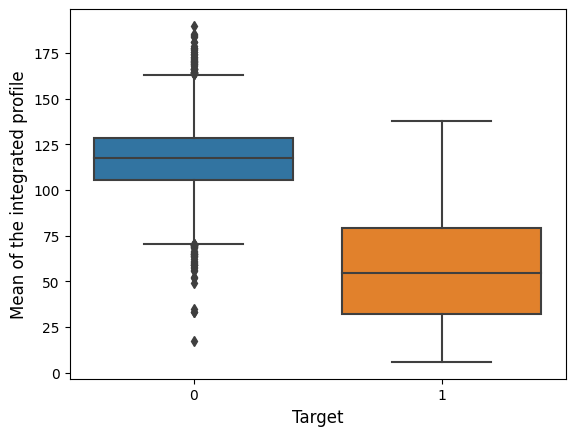

In [ ]:
sns.boxplot(df, y = ' Mean of the integrated profile' ,x = 'target_class')
plt.ylabel('Mean of the integrated profile', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

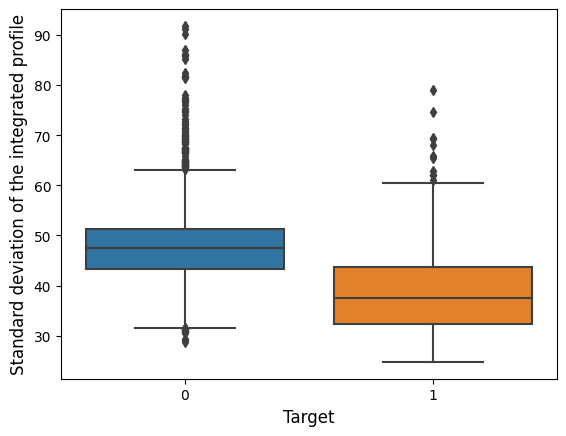

In [ ]:
sns.boxplot(df, y = ' Standard deviation of the integrated profile' ,x = 'target_class')
plt.ylabel('Standard deviation of the integrated profile', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

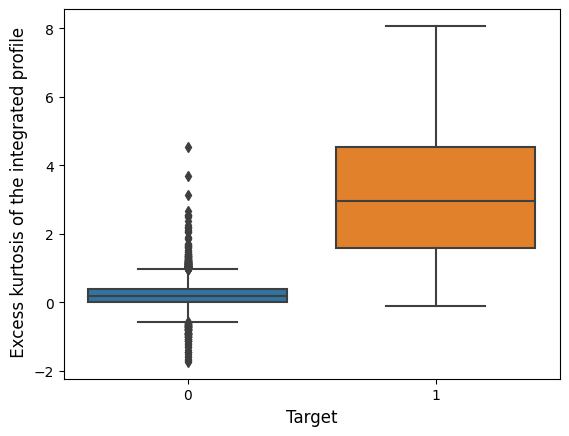

In [ ]:
sns.boxplot(df, y = ' Excess kurtosis of the integrated profile' ,x = 'target_class')
plt.ylabel(' Excess kurtosis of the integrated profile', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

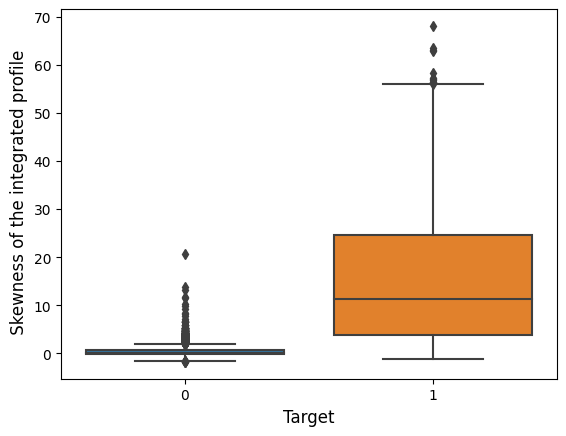

In [ ]:
sns.boxplot(df, y = ' Skewness of the integrated profile' ,x = 'target_class')
plt.ylabel(' Skewness of the integrated profile', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

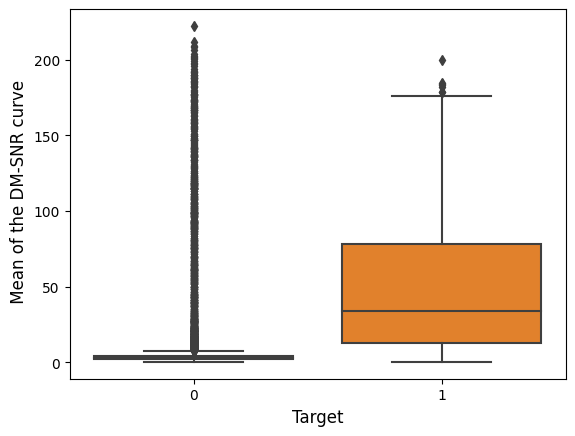

In [ ]:
sns.boxplot(df, y = ' Mean of the DM-SNR curve' ,x = 'target_class')
plt.ylabel(' Mean of the DM-SNR curve', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

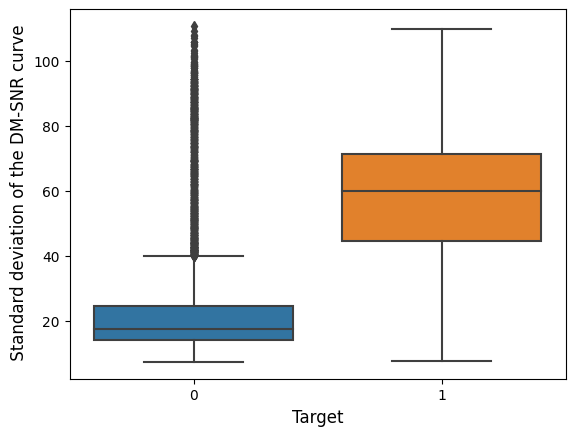

In [ ]:
sns.boxplot(df, y = ' Standard deviation of the DM-SNR curve' ,x = 'target_class')
plt.ylabel(' Standard deviation of the DM-SNR curve', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

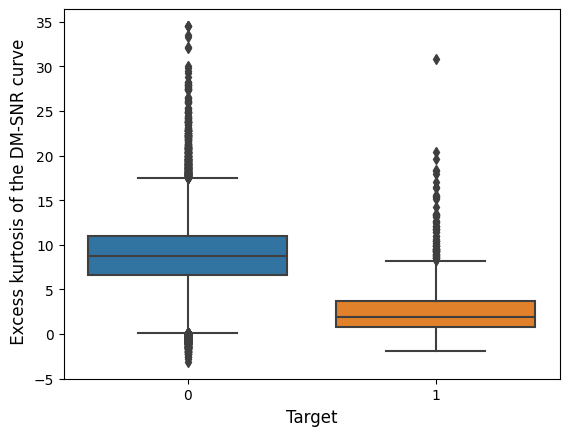

In [ ]:
sns.boxplot(df, y = ' Excess kurtosis of the DM-SNR curve' ,x = 'target_class')
plt.ylabel(' Excess kurtosis of the DM-SNR curve', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

Text(0.5, 0, 'Target')

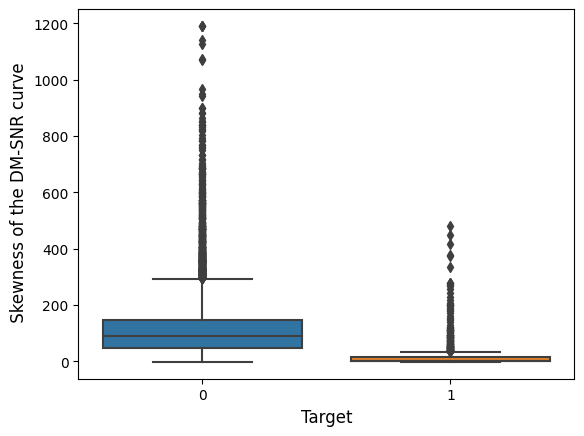

In [ ]:
sns.boxplot(df, y = ' Skewness of the DM-SNR curve' ,x = 'target_class')
plt.ylabel(' Skewness of the DM-SNR curve', fontsize = 12)
plt.xlabel('Target', fontsize = 12)

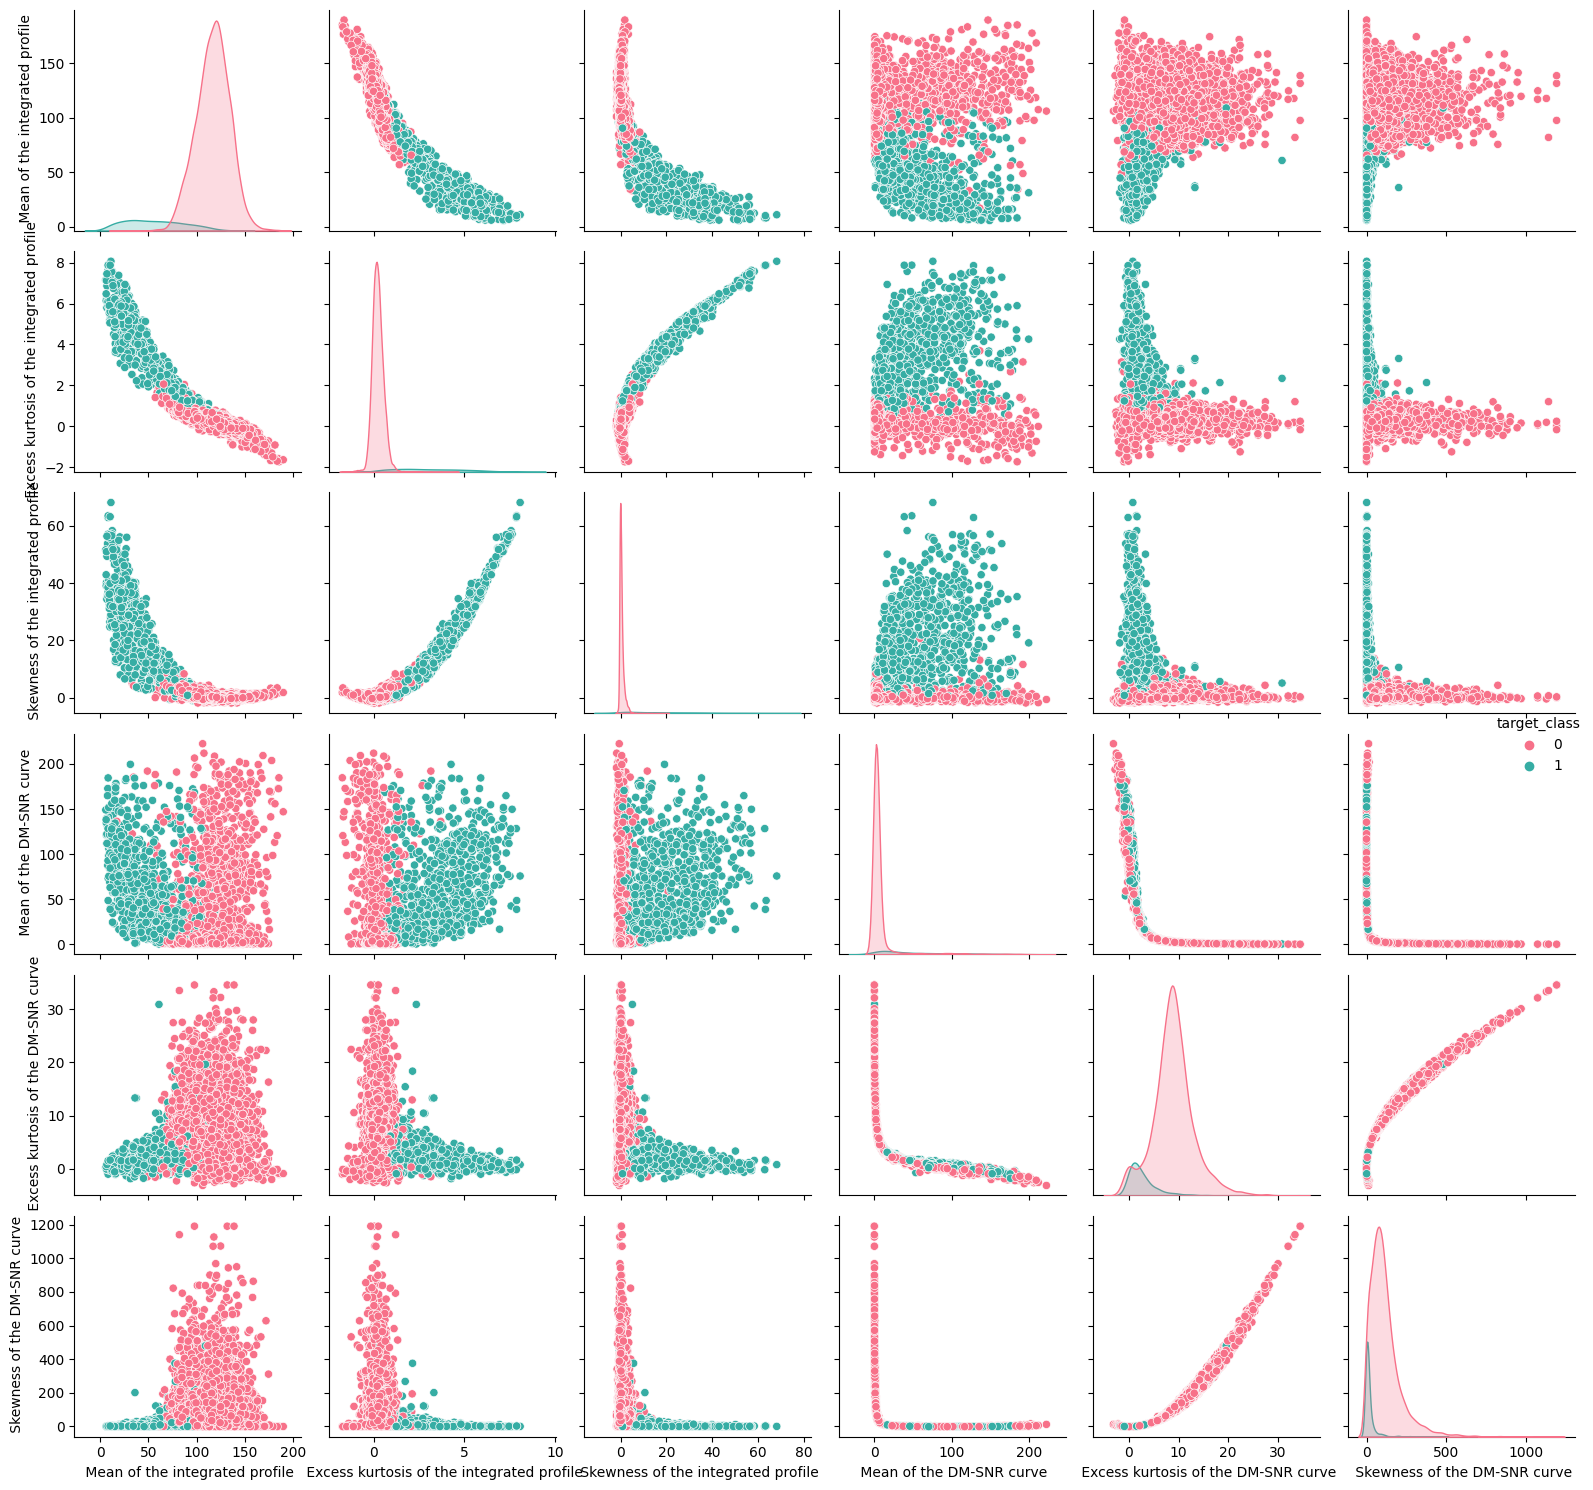

In [ ]:
sns.pairplot(data=df,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

# plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, ' Mean of the integrated profile'),
  Text(0, 1.5, ' Standard deviation of the integrated profile'),
  Text(0, 2.5, ' Excess kurtosis of the integrated profile'),
  Text(0, 3.5, ' Skewness of the integrated profile'),
  Text(0, 4.5, ' Mean of the DM-SNR curve'),
  Text(0, 5.5, ' Standard deviation of the DM-SNR curve'),
  Text(0, 6.5, ' Excess kurtosis of the DM-SNR curve'),
  Text(0, 7.5, ' Skewness of the DM-SNR curve'),
  Text(0, 8.5, 'target_class')])

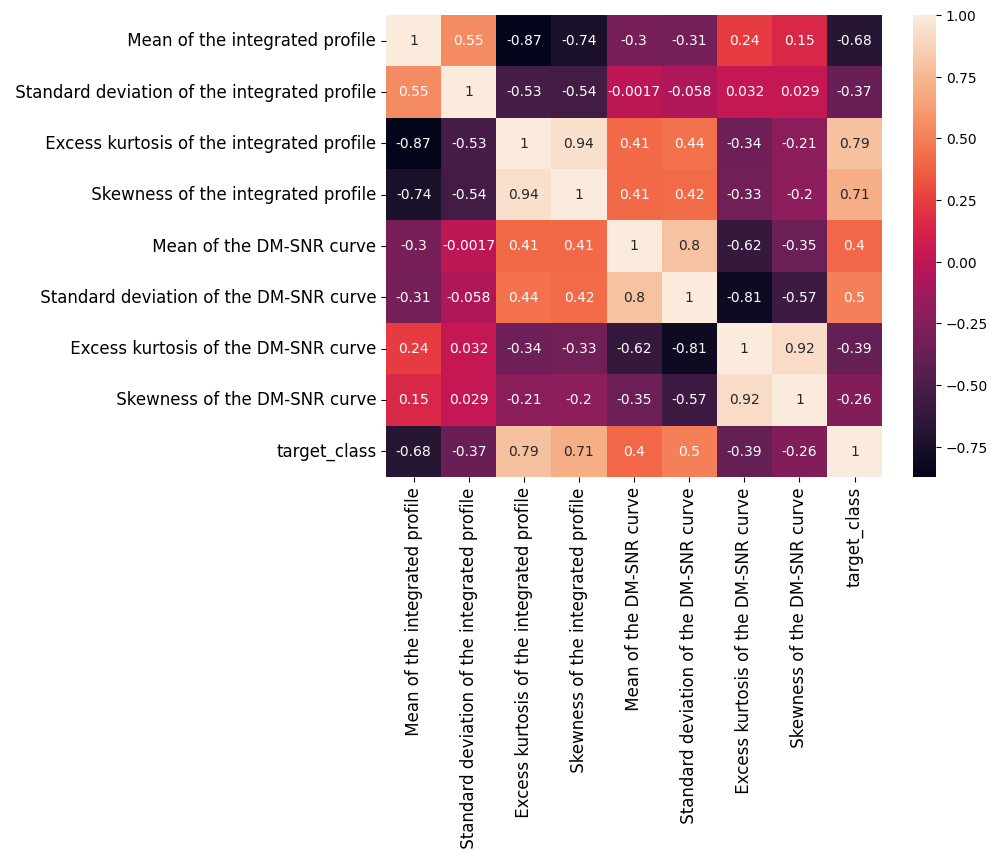

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)

## Observations
From the correlation heatmap it is clear that
1. Excess kurtosis of the integrated profile, Skewness of the integrated profile, and Standard deviation of the DM-SNR curve have high positive correlation (greater than 0.5) with the target class feature.
2. Apart from Mean of the DM-SNR curve, all reamining features have negative association with the target class feature.

## Handling Missing Values

In [ ]:
# Median Imputation
median_imputation = SimpleImputer(strategy = 'median')
median_imputed = median_imputation.fit_transform(df)
df_median_imputed = pd.DataFrame(median_imputed, columns = df.columns)

# Mean Imputation
mean_imputation = SimpleImputer(strategy = 'mean')
mean_imputed = mean_imputation.fit_transform(df)
df_mean_imputed = pd.DataFrame(mean_imputed, columns = df.columns)

# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df)
df_iter_imputed = pd.DataFrame(iter_imputed, columns = df.columns)

For verification of the imputations and plotting I have opted ' Excess kurtosis of the integrated profile' and ' Skewness of the integrated profile' because they have high positive association of 0.79, which can be seen in the plots.

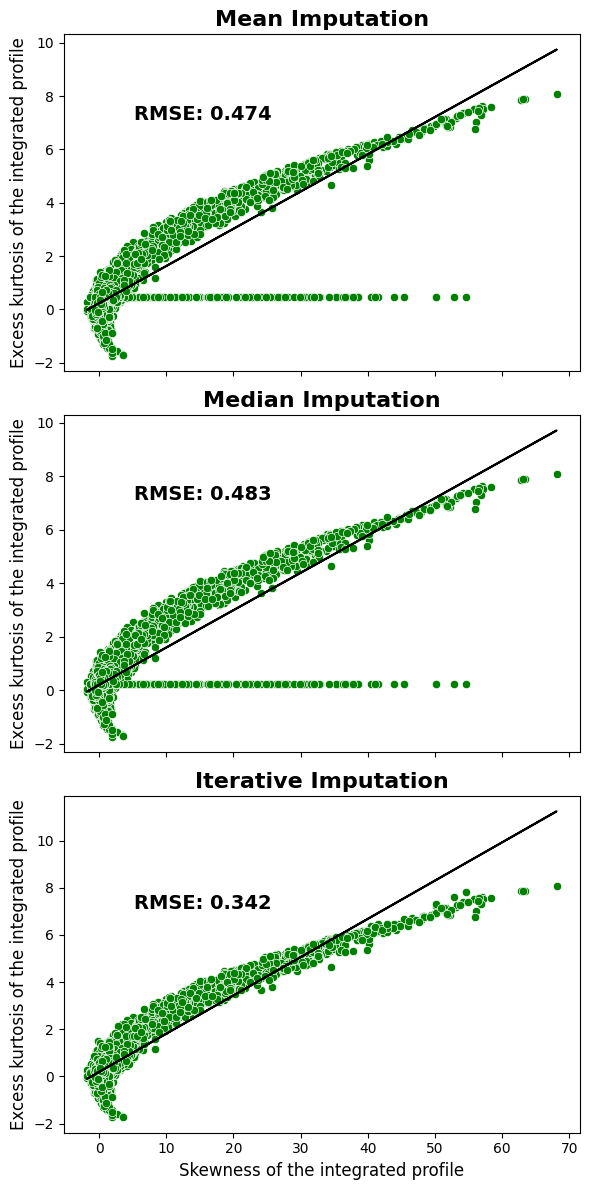

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (6, 12))
axes = np.reshape(axes, -1)

dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df in enumerate(dfs):
    # Plotting the data
    x = df[' Skewness of the integrated profile']
    y = df[' Excess kurtosis of the integrated profile']
    sns.scatterplot(x=x, y=y, ax=axes[i], color='green')

    # Fitting and plotting a linear regression line
    m, b = np.polyfit(x, y, 1)
    linreg = m * x + b
    axes[i].plot(x, linreg, color='black')

    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    rmse = round(mean_squared_error(y, linreg, squared=False), 3)
    text_x = min(x) + 0.1 * (max(x) - min(x))
    text_y = min(y) + 0.9 * (max(y) - min(y))
    axes[i].text(text_x, text_y, f'RMSE: {rmse}', fontsize=14, fontweight='bold')

    # Set y-axis label
    axes[i].set_ylabel("Excess kurtosis of the integrated profile", fontsize = 12)

# Set a common x-axis label
axes[-1].set_xlabel("Skewness of the integrated profile", fontsize = 12)

plt.tight_layout()
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, ' Mean of the integrated profile'),
  Text(0, 1.5, ' Standard deviation of the integrated profile'),
  Text(0, 2.5, ' Excess kurtosis of the integrated profile'),
  Text(0, 3.5, ' Skewness of the integrated profile'),
  Text(0, 4.5, ' Mean of the DM-SNR curve'),
  Text(0, 5.5, ' Standard deviation of the DM-SNR curve'),
  Text(0, 6.5, ' Excess kurtosis of the DM-SNR curve'),
  Text(0, 7.5, ' Skewness of the DM-SNR curve'),
  Text(0, 8.5, 'target_class')])

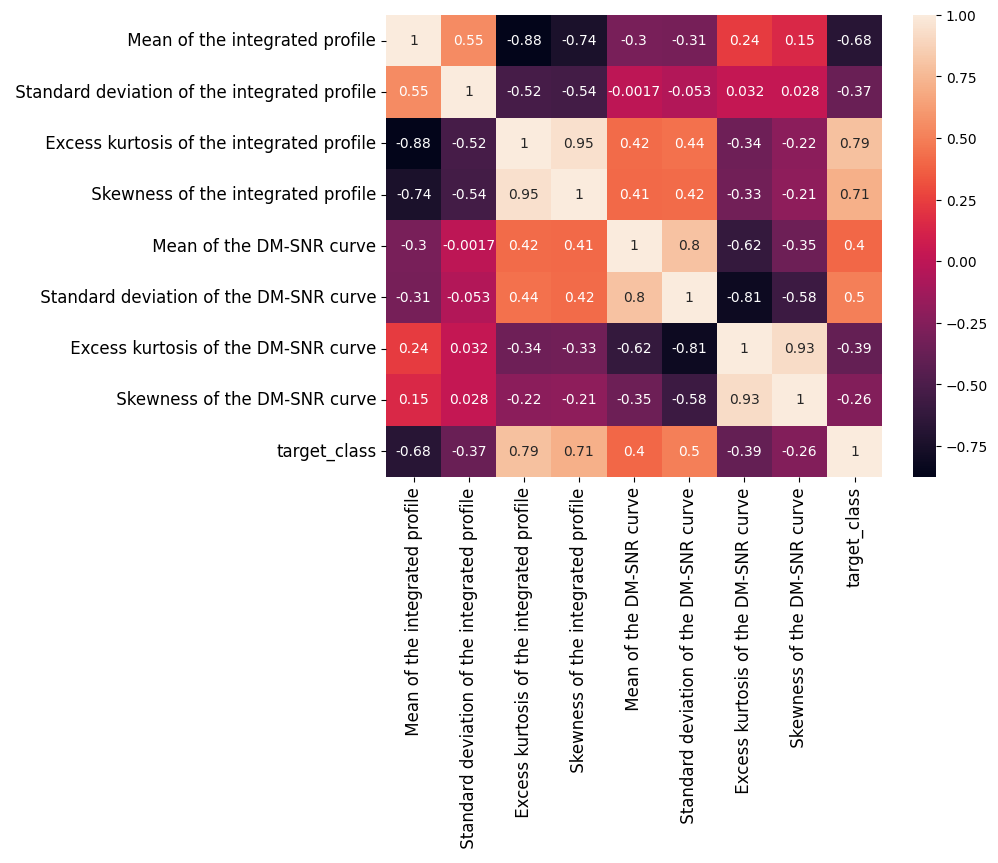

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_iter_imputed.corr(), annot = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)



---



---



## Train Validation split

In [ ]:
X = df_iter_imputed.drop('target_class', axis = 1)
y = df_iter_imputed['target_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = list(X.columns))
X_test = pd.DataFrame(X_test, columns = list(X.columns))

In [ ]:
X_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,-0.014800,0.008072,-0.200569,-0.267138,-0.327459,-0.345614,-0.060276,-0.265333
1,0.656612,-0.935945,-0.434856,-0.182541,-0.269155,-0.141328,-0.547480,-0.631169
2,0.519490,0.077371,-0.382747,-0.261074,-0.384134,-0.600240,1.028518,0.732324
3,-0.135008,-0.117301,-0.093828,-0.159627,-0.362088,-0.620212,0.469943,0.272002
4,0.837226,-0.515738,-0.549088,-0.214350,-0.351977,-0.410801,0.208092,-0.103956




---



---



## SVM with Default Parameters

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f'The accuracy of the model with default parameters is: {round(accuracy_score(y_test, y_pred), 4)}')

The accuracy of the model with default parameters is: 0.9816


In [ ]:
# Checking for overfitting and underfitting
print(f'Training data score: {round(svc.score(X_train, y_train), 4)}')
print(f'Test data score: {round(svc.score(X_test, y_test), 4)}')

Training data score: 0.9796
Test data score: 0.9816


Since both the scores are comparable so there are no chance of overfitting or underfitting.

So, the models accuracy is 0.9816, let's very this score with null accuracy.

In [ ]:
y_test.value_counts()

0.0    2279
1.0     227
Name: target_class, dtype: int64

In [ ]:
y_test.size

2506

In [ ]:
# Since 0 is the most frequent class

null_accuracy = (y_test == 0).sum() / y_test.size
print(f'The null accuracy of the model is: {round(null_accuracy, 4)}')

The null accuracy of the model is: 0.9094


So, the accuracy achieved by the model is greater than that of null accuracy hence our model is doing well.

<Axes: >

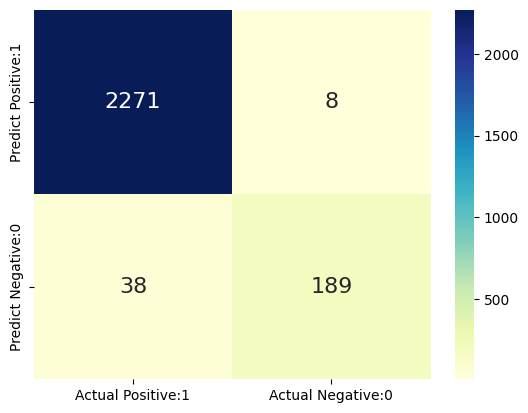

In [ ]:
cm = confusion_matrix(y_test, y_pred)
data_cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(data_cm, annot = True, fmt='d', cmap='YlGnBu', annot_kws = {'size': 16})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.83      0.89       227

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



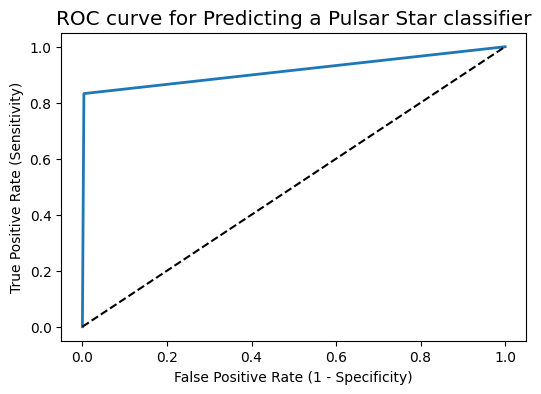

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'The precision of the model is: {round(precision_score(y_test, y_pred), 4)}')
print(f'The f1 score of the model is: {round(f1_score(y_test, y_pred), 4)}')
print(f'The ROC AUC score of the model is: {round(roc_auc_score(y_test, y_pred), 4)}')

The accuracy of the model is: 0.9816
The precision of the model is: 0.9594
The f1 score of the model is: 0.8915
The ROC AUC score of the model is: 0.9145


## Hyper parameter tuning

In [ ]:
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}
]


grid_search = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9816


Parameters that give the best results : 

 {'C': 10, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=10, kernel='linear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9832


### Making model with best estimators

In [ ]:
svc_new = SVC(C = 10, kernel = 'linear')
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(f'The accuracy of the model with default parameters is: {round(accuracy_score(y_test, y_pred_new), 4)}')

The accuracy of the model with default parameters is: 0.9832


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.83      0.89       227

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



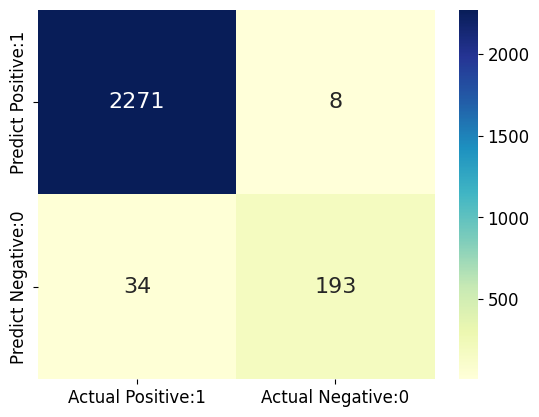

In [ ]:
cm = confusion_matrix(y_test, y_pred_new)
data_cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(data_cm, annot = True, fmt='d', cmap='YlGnBu', annot_kws = {'size': 16})
print(classification_report(y_test, y_pred))

In [ ]:
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred_new), 4)}')
print(f'The precision of the model is: {round(precision_score(y_test, y_pred_new), 4)}')
print(f'The f1 score of the model is: {round(f1_score(y_test, y_pred_new), 4)}')
print(f'The ROC AUC score of the model is: {round(roc_auc_score(y_test, y_pred_new), 4)}')

The accuracy of the model is: 0.9832
The precision of the model is: 0.9602
The f1 score of the model is: 0.9019
The ROC AUC score of the model is: 0.9234


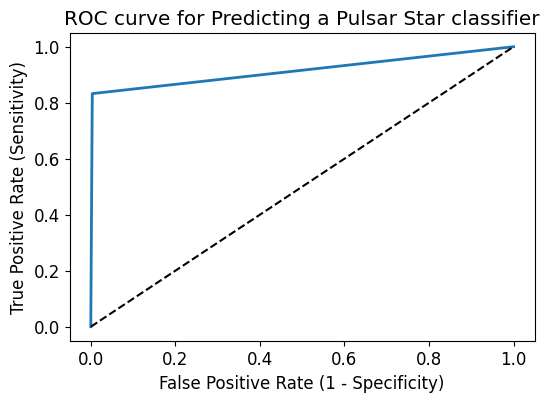

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



---



---



---



---



## Implementing the model to the test data

In [ ]:
test_data = pd.read_excel(test_data_path)
test_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [ ]:
for items in list(test_data.columns):
  s = test_data[items].isna().sum()
  print(f'The number of missing values in {items} are {s}')

The number of missing values in  Mean of the integrated profile are 0
The number of missing values in  Standard deviation of the integrated profile are 0
The number of missing values in  Excess kurtosis of the integrated profile are 767
The number of missing values in  Skewness of the integrated profile are 0
The number of missing values in  Mean of the DM-SNR curve are 0
The number of missing values in  Standard deviation of the DM-SNR curve are 524
The number of missing values in  Excess kurtosis of the DM-SNR curve are 0
The number of missing values in  Skewness of the DM-SNR curve are 244
The number of missing values in target_class are 5370


In [ ]:
X_test_data = test_data.drop('target_class', axis = 1)

iter_imp = IterativeImputer(random_state = 42)
imputed = iter_imp.fit_transform(X_test_data)
df_iterative_imputed = pd.DataFrame(imputed, columns = list(X.columns))

In [ ]:
scaled = scaler.fit_transform(df_iterative_imputed)
df = pd.DataFrame(scaled, columns = list(df_iterative_imputed.columns))
y_pred_test_data = svc_new.predict(df)

In [ ]:
print(np.unique(y_pred_test_data))

[0. 1.]


In [ ]:
print(f'The accuracy score is {svc.score(df, y_pred_test_data)}')

The accuracy score is 0.9945996275605214


In [ ]:
df_iterative_imputed['target_class'] = pd.DataFrame(y_pred_test_data)

In [ ]:
df_iterative_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     5370 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        5370 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5370 non-null   float64
 8   target_class                                   5370 non-null   float64
dtypes: float64(9)
memory usage: 377.7 KB


In [ ]:
df_iterative_imputed['target_class'].value_counts()

0.0    4944
1.0     426
Name: target_class, dtype: int64

In [ ]:
null_accur = (df_iterative_imputed['target_class'] == 0.0).sum() / df_iterative_imputed['target_class'].size
print(f'The null accuracy obtained by the model = {null_accur}')

The null accuracy obtained by the model = 0.9206703910614525
